# 0. 프로젝트 개요

### 프로젝트 목표
Kaggle 월마트 고객 구매 데이터를 기반으로 고객을 행동 중심으로 세그멘테이션하고,
매출 성장을 위해 가장 효과적으로 공략해야 할 마케팅 타겟을 도출하는 것을 목표로 함

### 데이터 출처 및 주요 데이터 구조
본 데이터는 Kaggle에 공개된 Walmart 고객 구매 데이터로,
 개별 구매 트랜잭션 단위로 고객 정보와 상품 정보, 구매 금액을 포함하고 있다.
주요 데이터 구조
고객 정보: 성별(Gender), 연령대(Age), 결혼 여부(Marital_Status), 직업 코드(Occupation)


상품 정보: Product_Category


거래 정보: Purchase (구매 금액)


특히 Occupation, Product_Category는 실제 의미를 갖는 값이 아닌 익명화된 범주형 인덱스로,
해당 값 자체에는 서열이나 크기 의미가 존재하지 않는다.


In [248]:
import pandas as pd

In [249]:
df = pd.read_csv('./walmart.csv')

# 1. 데이터 구조 확인

In [250]:
df.shape

(550068, 10)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [252]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### 변수 목록과 타입 확인
- User_ID: 식별자
- Product_ID: 식별자
- Gender: 범주형 (Nominal)
- Age: 범주형 (Ordinal)
- Occupation: 범주형 (Nominal)
- City_Category: 범주형 (Nominal)
- Stay_In_Current_City_Years: 범주형(Ordinal)
- Marital_Status: 범주형 (이진: 0 또는 1)
- Product_Category: 범주형 (Nominal)
- Purchase: 수치형(연속형)

In [253]:
cat_cols = [
    'Gender',
    'Age',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category'
]

In [254]:
def categorical_summary(df, col):
    """
    범주형 변수의 기초 통계량 요약
    - Count
    - Ratio (%)
    - Cumulative Ratio (%)
    """
    summary = (
        df[col]
        .value_counts(dropna=False)
        .to_frame('count')
        .assign(
            ratio=lambda x: x['count'] / x['count'].sum() * 100,
            cum_ratio=lambda x: x['ratio'].cumsum()
        )
    )
    return summary

In [255]:
for col in cat_cols:
    print(f"\n📌 [{col}] 범주형 기초 통계")
    display(categorical_summary(df, col))


📌 [Gender] 범주형 기초 통계


,count,ratio,cum_ratio
Gender,,,
M,414259,75.310507,75.310507
F,135809,24.689493,100.000000



📌 [Age] 범주형 기초 통계


,count,ratio,cum_ratio
Age,,,
26-35,219587,39.919974,39.919974
36-45,110013,19.999891,59.919864
18-25,99660,18.117760,78.037624
46-50,45701,8.308246,86.345870
51-55,38501,6.999316,93.345186
55+,21504,3.909335,97.254521
0-17,15102,2.745479,100.000000



📌 [Occupation] 범주형 기초 통계


,count,ratio,cum_ratio
Occupation,,,
4,72308,13.145284,13.145284
0,69638,12.659889,25.805173
7,59133,10.750125,36.555299
1,47426,8.621843,45.177142
17,40043,7.279645,52.456787
20,33562,6.101427,58.558215
12,31179,5.668208,64.226423
14,27309,4.964659,69.191082
2,26588,4.833584,74.024666



📌 [City_Category] 범주형 기초 통계


,count,ratio,cum_ratio
City_Category,,,
B,231173,42.026259,42.026259
C,171175,31.118880,73.145138
A,147720,26.854862,100.000000



📌 [Stay_In_Current_City_Years] 범주형 기초 통계


,count,ratio,cum_ratio
Stay_In_Current_City_Years,,,
1,193821,35.235825,35.235825
2,101838,18.513711,53.749536
3,95285,17.322404,71.071940
4+,84726,15.402823,86.474763
0,74398,13.525237,100.000000



📌 [Marital_Status] 범주형 기초 통계


,count,ratio,cum_ratio
Marital_Status,,,
0,324731,59.034701,59.034701
1,225337,40.965299,100.000000



📌 [Product_Category] 범주형 기초 통계


,count,ratio,cum_ratio
Product_Category,,,
5,150933,27.438971,27.438971
1,140378,25.520118,52.959089
8,113925,20.711076,73.670164
11,24287,4.415272,78.085437
2,23864,4.338373,82.423809
6,20466,3.720631,86.144440
3,20213,3.674637,89.819077
4,11753,2.136645,91.955722
16,9828,1.786688,93.742410


* Occupation과 Product_Category 인덱스는 숫자로 구분되어 있을 뿐, 실제 어떤 직업과 상품인지는 알 수 없음(구분 기능만 가능)

### 시각화 (히스토그램 - 범주형 변수 인덱스 분포 확인)

1) Demograpy 특성

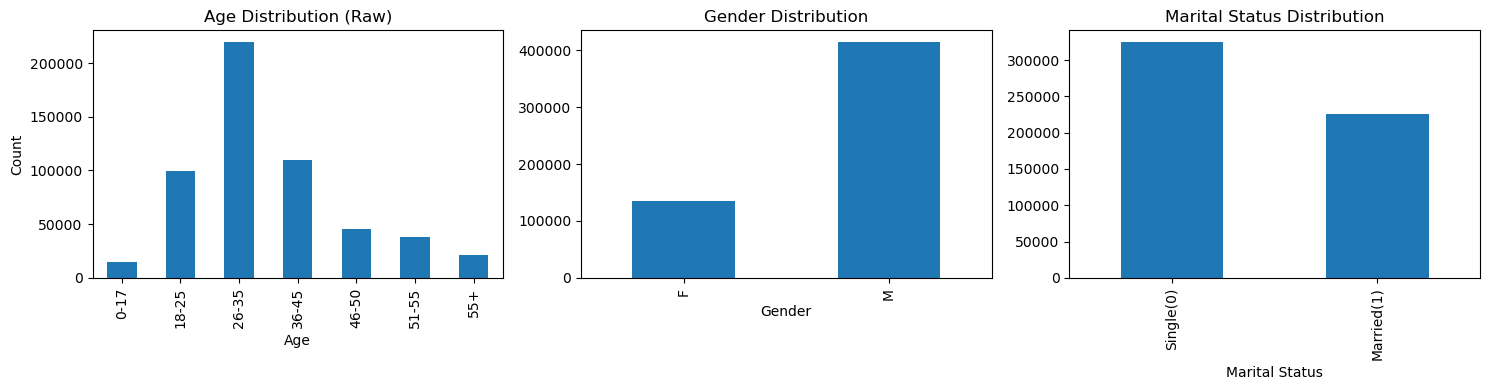

In [256]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1️⃣ Age (raw: 0-17, 18-25, ...)
df['Age'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[0]
)
axes[0].set_title('Age Distribution (Raw)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# 2️⃣ Gender
df['Gender'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[1]
)
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')

# 3️⃣ Marital_Status
df['Marital_Status'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[2]
)
axes[2].set_title('Marital Status Distribution')
axes[2].set_xlabel('Marital Status')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Single(0)', 'Married(1)'])

plt.tight_layout()
plt.show()


2) 거주지 관련 변수

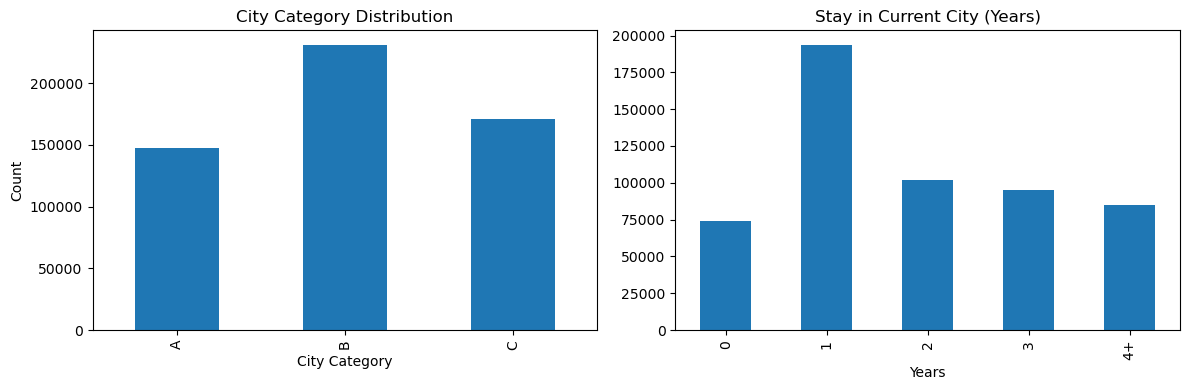

In [257]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 1️⃣ City_Category
df['City_Category'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[0]
)
axes[0].set_title('City Category Distribution')
axes[0].set_xlabel('City Category')
axes[0].set_ylabel('Count')

# 2️⃣ Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[1]
)
axes[1].set_title('Stay in Current City (Years)')
axes[1].set_xlabel('Years')

plt.tight_layout()
plt.show()


3) Occupation

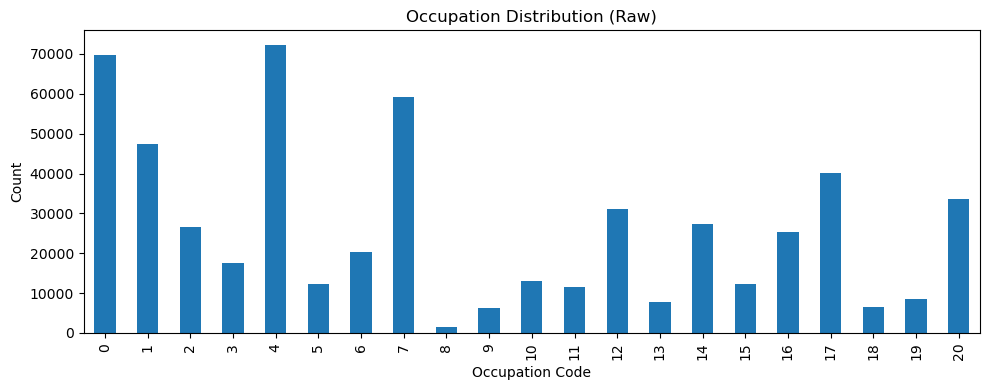

In [258]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

df['Occupation'].value_counts().sort_index().plot(
    kind='bar'
)

plt.title('Occupation Distribution (Raw)')
plt.xlabel('Occupation Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

4) Product_Category

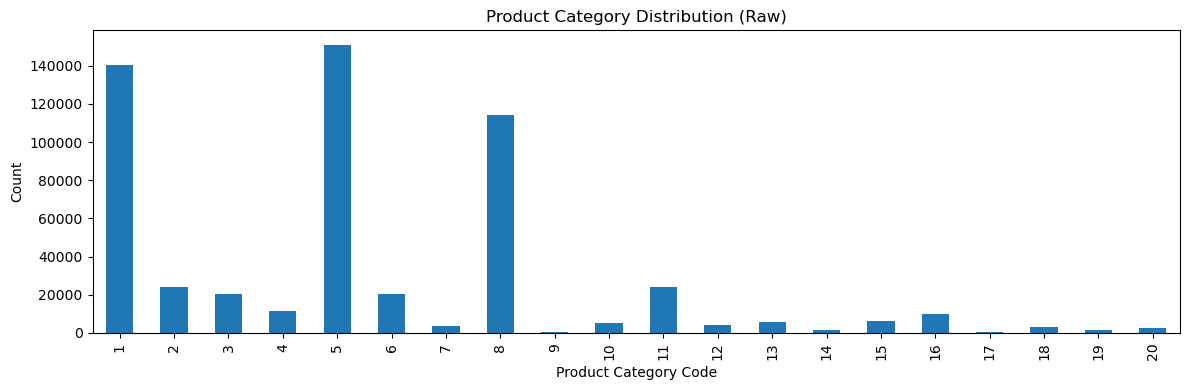

In [259]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

df['Product_Category'].value_counts().sort_index().plot(
    kind='bar'
)

plt.title('Product Category Distribution (Raw)')
plt.xlabel('Product Category Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 시각화 (수치형 Purchase 이상치 확인 - 박스플롯)

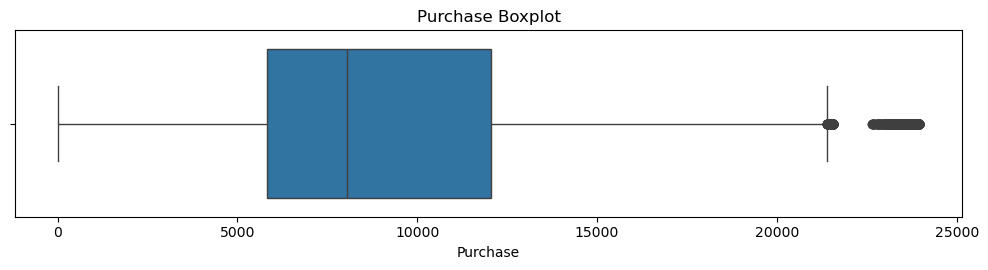

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 2.8))
sns.boxplot(x=df['Purchase'])
plt.title('Purchase Boxplot')
plt.xlabel('Purchase')
plt.tight_layout()
plt.show()


* 박스플롯 해석
- 중앙값: 8,000~9,000
- 1Q~3Q 범위: 5,500~12,000 (금액 분산이 큼)
- 하단 수염: 0 근처 -> 음수 없음(데이터 이상 없음)
- 상단 수염: 21,000~22,000 (정상범위 내에서도 고가 구매 꽤 많은 것으로 보임)
- 이상치: 22,000~24,000 부근에 점이 많음 -> 이상치로 보면 안됨 (seg.시, 프리미엄 구매 고객 데이터 확보 필요) 
        >> log 변환해서 저, 중, 고가 고객을 비교 가능하게 이상치를 완화 시키는 방법 선택

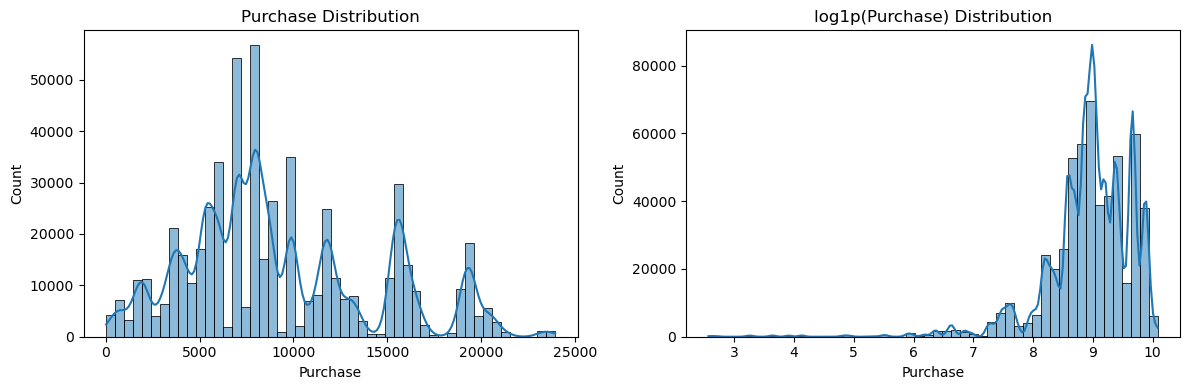

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Purchase'], bins=50, kde=True)
plt.title('Purchase Distribution')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Purchase']), bins=50, kde=True)
plt.title('log1p(Purchase) Distribution')

plt.tight_layout()
plt.show()


>> 대부분의 고객들은 중저가 영역에 몰려있어 log 변환하여 모든 고객의 구매 행동이 균형 있게 드러나게 조정

In [262]:
from scipy.stats import skew

purchase_skew = skew(df['Purchase'])
print(f"Purchase skewness: {purchase_skew:.3f}")


Purchase skewness: 0.600


왜도도 0.6 수준으로 충분히 안정적임.

<Figure size 1200x500 with 0 Axes>

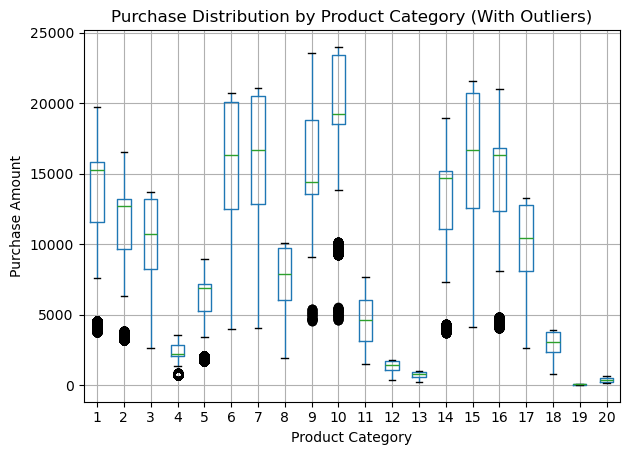

In [263]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

df.boxplot(
    column='Purchase',
    by='Product_Category'  # 이상치(showfliers)는 기본값 True
)

plt.title('Purchase Distribution by Product Category (With Outliers)')
plt.suptitle('')  # pandas boxplot 자동 제목 제거
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount')

plt.tight_layout()
plt.show()


저가 카테고리의 가격 분산이 작아, 조금만 비싸도 상대적 이상치로 표시 -> 업셀 가능성 보여주는 신호 (이상치 제거하면 안되는 근거 명확해짐)

# 2. 변수 병합 (Age, Occupation, Product_Category)
1. Age: Lifecycle에 따른 소비 특성 반영 -> 의미 기반 병합을 하되, 각 Age 구간별 빈도수 고려함(보수적 방법 활용)
2. Occupation/Product_Category: 숫자의 의미가 없기 때문에 Purchase와의 관계를 우선 파악 (히트맵)
   - Occupation: log1p(Purchase) 평균을 기준으로 저, 중, 고 소비 그룹+Ohter 그룹으로 병합
   - Product_Category: Product_Category별 구매금액 중앙값을 계산한 뒤, 그 값을 분위수 기준으로 나누어 저가, 중가, 고가의 가격대 세그먼트로 재정의

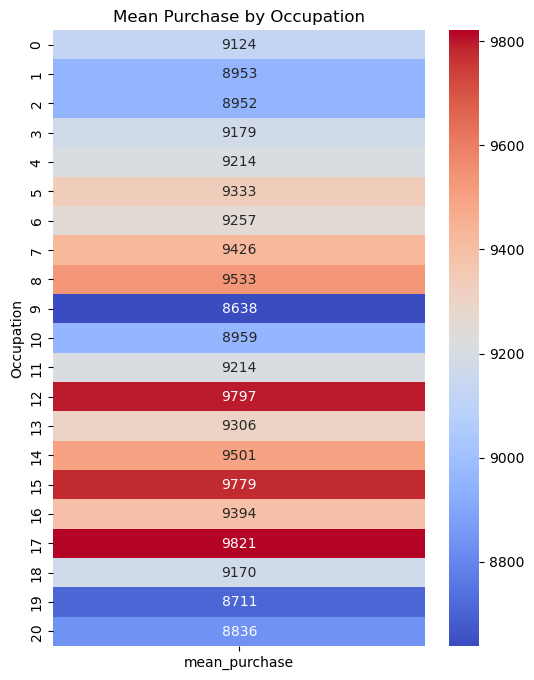

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

occ_purchase = (
    df.groupby('Occupation')['Purchase']
    .mean()
    .to_frame('mean_purchase')
)

plt.figure(figsize=(6, 8))
sns.heatmap(
    occ_purchase,
    annot=True,
    fmt='.0f',
    cmap='coolwarm'
)
plt.title('Mean Purchase by Occupation')
plt.show()


1. Age 병합

In [265]:
age_map = {
    '0-17': '0-17',
    '18-25': '18-25',
    '26-35': '26-35',
    '36-45': '36-45',
    '46-50': '46+',
    '51-55': '46+',
    '55+': '46+'
}

df['Age_grp'] = df['Age'].map(age_map)


2. Occupation 병합

* Purchase의 log 타겟 생성

In [266]:
import numpy as np

df['_log_purchase'] = np.log1p(df['Purchase'])


In [267]:
# 통계 계산
occ_stats = (
    df.groupby('Occupation')['_log_purchase']
    .agg(['mean', 'count'])
)


In [268]:
# 병합 기준선 설정
q1, q3 = occ_stats['mean'].quantile([0.25, 0.75])
total_n = len(df)


In [269]:
# 병합 매핑 함수
def map_occupation(row):
    if row['count'] / total_n < 0.01:
        return 'Occ_Other'
    elif row['mean'] <= q1:
        return 'Occ_Low'
    elif row['mean'] >= q3:
        return 'Occ_High'
    else:
        return 'Occ_Mid'


In [270]:
# 컬럼 생성
occ_map = occ_stats.apply(map_occupation, axis=1)
df['Occupation_grp'] = df['Occupation'].map(occ_map)


3. Product_Category 병합

In [271]:
# 카테고리별 대표 가격 계산
prod_price = (
    df.groupby('Product_Category')['Purchase']
    .median()
    .to_frame('median_price')
)

In [272]:
# 가격대 경계 설정(삼분위)
low_th, high_th = prod_price['median_price'].quantile([1/3, 2/3])


In [273]:
# 가격대 매핑 함수
def map_price_segment(price):
    if price <= low_th:
        return 'Price_Low'
    elif price <= high_th:
        return 'Price_Mid'
    else:
        return 'Price_High'


In [274]:
# 가격대 세그먼트 컬럼 생성
price_seg_map = prod_price['median_price'].apply(map_price_segment)

df['Price_Segment'] = df['Product_Category'].map(price_seg_map)


In [275]:
df.groupby('Price_Segment')['Purchase'].agg(['mean','median','count'])

,mean,median,count
Price_Segment,,,
Price_High,14167.449264,15353.0,187331
Price_Low,3044.767562,2814.0,52814
Price_Mid,7359.905364,7120.0,309923


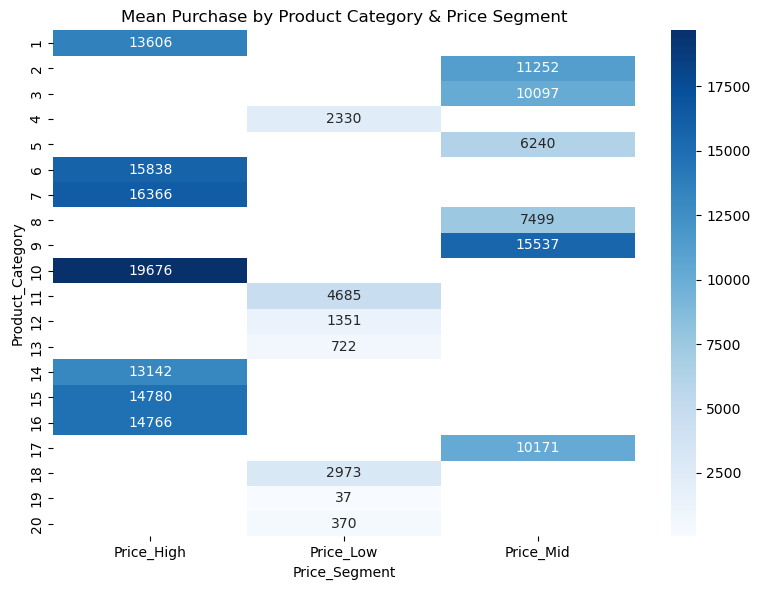

In [276]:
import seaborn as sns

pivot = pd.pivot_table(
    df,
    values='Purchase',
    index='Product_Category',
    columns='Price_Segment',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')

plt.title('Mean Purchase by Product Category & Price Segment')
plt.tight_layout()
plt.show()

### 병합 구조 점검

In [277]:
cols = ['Age_grp', 'Occupation_grp', 'Price_Segment']

for col in cols:
    print(f'\n[{col}]')
    print(df[col].value_counts(normalize=True))



[Age_grp]
Age_grp
26-35    0.399200
36-45    0.199999
46+      0.192169
18-25    0.181178
0-17     0.027455
Name: proportion, dtype: float64

[Occupation_grp]
Occupation_grp
Occ_Mid      0.503932
Occ_High     0.247364
Occ_Low      0.245893
Occ_Other    0.002811
Name: proportion, dtype: float64

[Price_Segment]
Price_Segment
Price_Mid     0.563427
Price_High    0.340560
Price_Low     0.096014
Name: proportion, dtype: float64


occupation_grp 인덱스 설명
- Occ_Low / Mid / High : 저소비/평균소비/고소비 성향 직업군 *other는 통계적으로 불안정하여 별도 그룹으로 분리
Price_Segment 인덱스 설명
- Price_Low / Mid / High : 상대적 저가/중가/고가 상품군

### 변수들 간의 관계 확인

In [278]:
df.groupby('Occupation_grp')['Purchase'].agg(['mean','median','std','count'])

,mean,median,std,count
Occupation_grp,,,,
Occ_High,9667.977959,8278.0,5096.914483,136067
Occ_Low,8894.840209,7942.0,4910.593874,135258
Occ_Mid,9244.271403,8038.0,5026.755286,277197
Occ_Other,9532.592497,8419.5,4916.641374,1546


In [279]:
df.groupby('Price_Segment')['Purchase'].agg(['mean','median','std','count'])

,mean,median,std,count
Price_Segment,,,,
Price_High,14167.449264,15353.0,4469.731956,187331
Price_Low,3044.767562,2814.0,2119.876853,52814
Price_Mid,7359.905364,7120.0,2681.422980,309923


>> 

In [280]:
df.groupby('Gender')['Purchase'].agg(['mean','median','std','count'])

,mean,median,std,count
Gender,,,,
F,8734.565765,7914.0,4767.233289,135809
M,9437.526040,8098.0,5092.186210,414259


In [281]:
df.groupby('City_Category')['Purchase'].agg(['mean','median','std','count'])

,mean,median,std,count
City_Category,,,,
A,8911.939216,7931.0,4892.115238,147720
B,9151.300563,8005.0,4955.496566,231173
C,9719.920993,8585.0,5189.465121,171175


In [282]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].agg(['mean','median','std','count'])

,mean,median,std,count
Stay_In_Current_City_Years,,,,
0,9180.075123,8025.0,4990.479940,74398
1,9250.145923,8041.0,5027.476933,193821
2,9320.429810,8072.0,5044.588224,101838
3,9286.904119,8047.0,5020.343541,95285
4+,9275.598872,8052.0,5017.627594,84726


In [283]:
df.groupby('Marital_Status')['Purchase'].agg(['mean','median','std','count'])

,mean,median,std,count
Marital_Status,,,,
0,9265.907619,8044.0,5027.347859,324731
1,9261.174574,8051.0,5016.897378,225337


# 3. 고객 세그먼트
활용변수
- 인구통계 : Age_Grp, Gender
- 경제력/행동: Occupation_grp
- 상품전략: Price_Segment
- 타겟지표: Purchase

순서
세그먼트 도출 >> 세그먼트별 매출 기여도 도출 >> 스코어링 >> 타겟 후보 결정 >> 타겟 프로파일링

1. 준비: 필수 컬럼 체크 

In [284]:
import numpy as np
import pandas as pd

required = ['Age_grp', 'Gender', 'Occupation_grp', 'Price_Segment', 'Purchase']
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"df에 필요한 컬럼이 없습니다: {missing}")

# 세그먼트 문자열 안정 생성
for c in ['Age_grp', 'Gender', 'Occupation_grp', 'Price_Segment']:
    df[c] = df[c].astype(str)

df['log_purchase'] = np.log1p(df['Purchase'])

2. 세그먼트 도출

In [285]:
seg_cols = ['Age_grp', 'Gender', 'Occupation_grp', 'Price_Segment']
df['Segment_AGOP'] = df[seg_cols].agg(' | '.join, axis=1)

In [286]:
# 고객 수: User_ID가 있으면 unique 고객 수, 없으면 거래수로 대체
if 'User_ID' in df.columns:
    customers_agg = ('User_ID', 'nunique')
else:
    customers_agg = ('Segment_AGOP', 'size')

seg = (
    df.groupby('Segment_AGOP')
      .agg(
          customers=customers_agg,
          transactions=('Segment_AGOP', 'size'),
          revenue=('Purchase', 'sum'),
          avg_purchase=('Purchase', 'mean'),
          median_purchase=('Purchase', 'median')
      )
      .reset_index()
)

seg['revenue_share'] = seg['revenue'] / seg['revenue'].sum()
seg = seg.sort_values('revenue', ascending=False)

seg.head(20)

,Segment_AGOP,customers,transactions,revenue,avg_purchase,median_purchase,revenue_share
54,26-35 | M | Occ_Mid | Price_High,699,30804,428816831,13920.816485,15297.0,0.084151
56,26-35 | M | Occ_Mid | Price_Mid,698,43925,314016392,7148.921844,7052.0,0.061622
48,26-35 | M | Occ_High | Price_High,533,20242,286821908,14169.642723,15348.0,0.056286
33,18-25 | M | Occ_Mid | Price_High,489,18596,259828558,13972.282104,15310.5,0.050989
78,36-45 | M | Occ_Mid | Price_High,385,13952,200542868,14373.772076,15383.0,0.039354
35,18-25 | M | Occ_Mid | Price_Mid,487,26919,196099930,7284.814815,7091.0,0.038483
50,26-35 | M | Occ_High | Price_Mid,536,25625,190411185,7430.680390,7116.0,0.037366
102,46+ | M | Occ_Mid | Price_High,461,12215,177781883,14554.390749,15438.0,0.034888
51,26-35 | M | Occ_Low | Price_High,265,12542,172243257,13733.316616,15245.5,0.033801
72,36-45 | M | Occ_High | Price_High,294,10646,154307579,14494.418467,15426.0,0.030281


3. 세그먼트별 현재 매출 기여도

In [287]:
def minmax(s):
    return (s - s.min()) / (s.max() - s.min() + 1e-9)

seg['rev_norm']  = minmax(seg['revenue'])
seg['cust_norm'] = minmax(seg['customers'])
seg['aov_norm']  = minmax(seg['avg_purchase'])

# 성장 타겟 스코어(가중치 조정 가능)
seg['target_score'] = 0.5*seg['rev_norm'] + 0.3*seg['cust_norm'] + 0.2*seg['aov_norm']
seg.sort_values('target_score', ascending=False).head(20)

,Segment_AGOP,customers,transactions,revenue,avg_purchase,median_purchase,revenue_share,rev_norm,cust_norm,aov_norm,target_score
54,26-35 | M | Occ_Mid | Price_High,699,30804,428816831,13920.816485,15297.0,0.084151,1.000000,1.000000,0.891687,0.978337
48,26-35 | M | Occ_High | Price_High,533,20242,286821908,14169.642723,15348.0,0.056286,0.668866,0.762178,0.910076,0.745101
56,26-35 | M | Occ_Mid | Price_Mid,698,43925,314016392,7148.921844,7052.0,0.061622,0.732284,0.998567,0.391225,0.743957
33,18-25 | M | Occ_Mid | Price_High,489,18596,259828558,13972.282104,15310.5,0.050989,0.605917,0.699140,0.895491,0.691799
102,46+ | M | Occ_Mid | Price_High,461,12215,177781883,14554.390749,15438.0,0.034888,0.414583,0.659026,0.938510,0.592701
78,36-45 | M | Occ_Mid | Price_High,385,13952,200542868,14373.772076,15383.0,0.039354,0.467662,0.550143,0.925162,0.583906
50,26-35 | M | Occ_High | Price_Mid,536,25625,190411185,7430.680390,7116.0,0.037366,0.444034,0.766476,0.412047,0.534369
35,18-25 | M | Occ_Mid | Price_Mid,487,26919,196099930,7284.814815,7091.0,0.038483,0.457301,0.696275,0.401268,0.517786
72,36-45 | M | Occ_High | Price_High,294,10646,154307579,14494.418467,15426.0,0.030281,0.359840,0.419771,0.934078,0.492667
51,26-35 | M | Occ_Low | Price_High,265,12542,172243257,13733.316616,15245.5,0.033801,0.401666,0.378223,0.877830,0.489866


4. Defend / Grow / Expand 세 가지로 Segment 분류

In [288]:
MIN_TX = 500  # 데이터 크기에 맞게 200~2000 사이에서 조정 추천

seg_f = seg[seg['transactions'] >= MIN_TX].copy()
seg_f.sort_values('target_score', ascending=False).head(20)

,Segment_AGOP,customers,transactions,revenue,avg_purchase,median_purchase,revenue_share,rev_norm,cust_norm,aov_norm,target_score
54,26-35 | M | Occ_Mid | Price_High,699,30804,428816831,13920.816485,15297.0,0.084151,1.000000,1.000000,0.891687,0.978337
48,26-35 | M | Occ_High | Price_High,533,20242,286821908,14169.642723,15348.0,0.056286,0.668866,0.762178,0.910076,0.745101
56,26-35 | M | Occ_Mid | Price_Mid,698,43925,314016392,7148.921844,7052.0,0.061622,0.732284,0.998567,0.391225,0.743957
33,18-25 | M | Occ_Mid | Price_High,489,18596,259828558,13972.282104,15310.5,0.050989,0.605917,0.699140,0.895491,0.691799
102,46+ | M | Occ_Mid | Price_High,461,12215,177781883,14554.390749,15438.0,0.034888,0.414583,0.659026,0.938510,0.592701
78,36-45 | M | Occ_Mid | Price_High,385,13952,200542868,14373.772076,15383.0,0.039354,0.467662,0.550143,0.925162,0.583906
50,26-35 | M | Occ_High | Price_Mid,536,25625,190411185,7430.680390,7116.0,0.037366,0.444034,0.766476,0.412047,0.534369
35,18-25 | M | Occ_Mid | Price_Mid,487,26919,196099930,7284.814815,7091.0,0.038483,0.457301,0.696275,0.401268,0.517786
72,36-45 | M | Occ_High | Price_High,294,10646,154307579,14494.418467,15426.0,0.030281,0.359840,0.419771,0.934078,0.492667
51,26-35 | M | Occ_Low | Price_High,265,12542,172243257,13733.316616,15245.5,0.033801,0.401666,0.378223,0.877830,0.489866


In [289]:
def bucketize(seg_str):
    # seg_str: "Age | Gender | Occ | Price"
    if ('Occ_High' in seg_str) and ('Price_High' in seg_str):
        return 'Defend'
    if ('Occ_Mid' in seg_str) and ('Price_Mid' in seg_str):
        return 'Grow'
    if (('Occ_Mid' in seg_str) or ('Occ_High' in seg_str)) and ('Price_Low' in seg_str):
        return 'Expand'
    return 'Other'

seg_f['bucket'] = seg_f['Segment_AGOP'].apply(bucketize)

top_targets = (
    seg_f[seg_f['bucket'].isin(['Defend','Grow','Expand'])]
    .sort_values(['bucket', 'target_score'], ascending=[True, False])
    .groupby('bucket')
    .head(5)
)

top_targets[['bucket','Segment_AGOP','customers','transactions','revenue','revenue_share','avg_purchase','target_score']]

,bucket,Segment_AGOP,customers,transactions,revenue,revenue_share,avg_purchase,target_score
48,Defend,26-35 | M | Occ_High | Price_High,533,20242,286821908,0.056286,14169.642723,0.745101
72,Defend,36-45 | M | Occ_High | Price_High,294,10646,154307579,0.030281,14494.418467,0.492667
96,Defend,46+ | M | Occ_High | Price_High,299,8691,127101817,0.024942,14624.533080,0.465017
27,Defend,18-25 | M | Occ_High | Price_High,148,5487,78243337,0.015354,14259.766175,0.337756
39,Defend,26-35 | F | Occ_High | Price_High,93,2487,35189600,0.006906,14149.416968,0.262285
55,Expand,26-35 | M | Occ_Mid | Price_Low,679,7573,24470690,0.004802,3231.307276,0.340274
49,Expand,26-35 | M | Occ_High | Price_Low,519,4612,14773881,0.002899,3203.356678,0.259786
34,Expand,18-25 | M | Occ_Mid | Price_Low,454,4577,14389016,0.002824,3143.765785,0.230520
103,Expand,46+ | M | Occ_Mid | Price_Low,437,4330,13228676,0.002596,3055.121478,0.220550
79,Expand,36-45 | M | Occ_Mid | Price_Low,375,4149,13373469,0.002624,3223.299349,0.196557


- Defend : 이미 매출 기여도가 높은 Loyal 고객군
- Grow : 구매 빈도가 높아 프로모션으로 매출 볼륨 키우기가 좋은 고객군
- Expand: 고객 규모는 큰데, 지갑을 잘 열지 않는 잠재 성장 고객군

5. 상위 타겟 1개 상세 프로파일링

In [290]:
target = top_targets.iloc[0]['Segment_AGOP']  # 상위 1개 타겟
tmp = df[df['Segment_AGOP'] == target].copy()

print("Target:", target)
print("Transactions:", len(tmp))
print("Gross_Sales:", tmp['Purchase'].sum())
print("Avg Purchase:", tmp['Purchase'].mean())
print("Median Purchase:", tmp['Purchase'].median())

Target: 26-35 | M | Occ_High | Price_High
Transactions: 20242
Gross_Sales: 286821908
Avg Purchase: 14169.642723051082
Median Purchase: 15348.0


6. 가장 마케팅이 시급한 타겟 1개 상세 프로파일링

In [291]:
import pandas as pd

# 0) 세그먼트 컬럼이 없으면 생성 (이미 있으면 이 블록은 그대로 지나감)
if 'Segment_AGOP' not in df.columns:
    seg_cols = ['Age_grp', 'Gender', 'Occupation_grp', 'Price_Segment']
    df['Segment_AGOP'] = df[seg_cols].astype(str).agg(' | '.join, axis=1)

# 1) 세그먼트별 요약 테이블(seg_f) 생성
seg_f = (
    df.groupby('Segment_AGOP')
      .agg(
          transactions=('Segment_AGOP', 'size'),
          gross_sales=('Purchase', 'sum'),
          avg_purchase=('Purchase', 'mean'),
          median_purchase=('Purchase', 'median')
      )
      .reset_index()
)

# (선택) 너무 작은 세그먼트 제외: 필요 없으면 이 줄 삭제
MIN_TX = 500
seg_f = seg_f[seg_f['transactions'] >= MIN_TX].copy()

# 2) Expand 상위 1개 선택 (Price_Low & Occ_Mid/Occ_High 중 거래수 최대)
expand_target = (
    seg_f[
        seg_f['Segment_AGOP'].str.contains('Price_Low') &
        (
            seg_f['Segment_AGOP'].str.contains('Occ_Mid') |
            seg_f['Segment_AGOP'].str.contains('Occ_High')
        )
    ]
    .sort_values('transactions', ascending=False)
    .iloc[0]['Segment_AGOP']
)

# 3) 기존 상위 타겟과 동일한 포맷으로 프로파일링
tmp = df[df['Segment_AGOP'] == expand_target].copy()

print("Target:", expand_target)
print("Transactions:", len(tmp))
print("Gross_Sales:", tmp['Purchase'].sum())
print("Avg Purchase:", tmp['Purchase'].mean())
print("Median Purchase:", tmp['Purchase'].median())


Target: 26-35 | M | Occ_Mid | Price_Low
Transactions: 7573
Gross_Sales: 24470690
Avg Purchase: 3231.3072758484086
Median Purchase: 3012.0


# 4. 결론

1. 핵심타겟 (Defend)
- Target(타겟 그룹 정의): 26-35 남성이며, 고소비 성향 직업군을 가지고 있고, 고가 상품군을 주로 구매하는 그룹
- Transaction(이 seg.에서 발생한 구매 건수): 20,242 >> 캠페인 시, 볼륨이 나올 수 있는 타겟 규모
- Gross_Sales(총매출): 286,821,908
- Avg PUrchase(평균 구매금액): 14,169
- Median Purchase(구매 중앙값): 15,348

2. 마케팅 시급 타겟 (Expand)
- Target(타겟 그룹 정의): 26-35 남성이며, 중소비 성향 직업군을 가지고 있고, 저가 상품군을 주로 구매하는 그룹
- Transaction(이 seg.에서 발생한 구매 건수): 7573 >> 캠페인 시, 볼륨이 나올 있는 타겟 규모
- Gross_Sales(총매출): 24,470,690
- Avg PUrchase(평균 구매금액): 3,231
- Median Purchase(구매 중앙값): 3,012